In [28]:
import numpy as np
import pandas as pd

# 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [29]:
# load numpy array
data = np.load('./data/data_pca_30_target.npz')
data.files

['arr_0', 'arr_1']

In [30]:
data.allow_pickle = True

In [31]:
X = data['arr_0'] # pca data with 50 components
y = data['arr_1'] # target or dependent variable

In [32]:
X.shape,y.shape

((262, 30), (262,))

In [33]:
X

array([[ 1.29272447, -1.23696042, -0.26743144, ...,  1.96358549,
        -0.0579973 ,  0.10216754],
       [-0.68676889, -0.63515624,  1.27029767, ...,  0.10976348,
         0.02474352, -1.21129296],
       [ 0.09873896, -2.27115924,  1.47656493, ..., -1.5084822 ,
         2.36393464, -0.79572205],
       ...,
       [-0.09294484,  0.7222733 , -1.43889974, ..., -1.1129623 ,
         0.50699024,  1.1028905 ],
       [ 0.34421135,  1.36585829, -0.16743978, ...,  0.14474637,
        -0.23768579, -0.90297878],
       [-0.50742427, -0.29406619, -1.47438122, ..., -0.16184306,
         1.01797144, -0.34040521]])

In [34]:
y

array(['Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry', 'Henry',
       'Henry', 'Hen

### split the data into train and test

In [35]:
x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(209, 30) (53, 30) (209,) (53,)


### training machine learning model

In [36]:
model_svc = SVC(probability=True)

param_grid = {'C':[0.5,1,10,20,30,50],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]}

In [37]:
model_grid = GridSearchCV(model_svc,
                          param_grid=param_grid,
                          scoring='accuracy',cv=3,verbose=2)

In [38]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=0.5, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=0.5, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .............C=0.5, coef0=0, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ............C=0.5, coef0=0, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ............C=0.5, coef0=0, gamma=0.0

[CV] END .............C=1, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END ..............C=1, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END .............C=1, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=1, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1,

[CV] END ............C=10, coef0=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=10, coef0=1, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=10, coef0=1, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=10, coef0=1, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END ............C=10, coef0=1, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ............C=10, coef0=1, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ............C=10, c

[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END .............C=30, 

[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=50, coef0=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ............C=50, coef0=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .............C=50, coef0=1, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=50, 

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10, 20, 30, 50], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [39]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.01, 'kernel': 'rbf'}

In [40]:
model_final = model_grid.best_estimator_

In [41]:
model_final.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Model Evaluation
- Classification Report
    - Precision, Recall, F1-Score
- Kappa Score
    - -ve (worst model)
    - 0 to 0.5 (bad model)
    - 0.5 to 0.7 (Good Model)
    - 0.7 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)
- AUC
    - Less than 0.5 (Worst Model)
    - 0.5 to 0.6 (Bad Model)
    - 0.6 to 0.8 (Good Model)
    - 0.8 to 0.9 (Excellent Model)
    - 0.9 to 1.0 (Perfect Model)

In [42]:
y_pred = model_final.predict(x_test) # predicted values

In [43]:
y_pred

array(['Van', 'Van', 'Van', 'Henry', 'Henry', 'Van', 'Henry', 'Van',
       'Van', 'Henry', 'Henry', 'Van', 'Henry', 'Van', 'Henry', 'Henry',
       'Van', 'Henry', 'Van', 'Van', 'Van', 'Henry', 'Henry', 'Henry',
       'Van', 'Henry', 'Van', 'Van', 'Van', 'Van', 'Van', 'Henry',
       'Henry', 'Henry', 'Van', 'Henry', 'Henry', 'Henry', 'Van', 'Henry',
       'Henry', 'Van', 'Van', 'Van', 'Henry', 'Van', 'Van', 'Van',
       'Henry', 'Van', 'Van', 'Van', 'Henry'], dtype=object)

**Classification Report**

In [44]:
cr = metrics.classification_report(y_test,y_pred,output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Henry,1.000000,0.960000,0.979592,25.000000
Van,0.965517,1.000000,0.982456,28.000000
accuracy,0.981132,0.981132,0.981132,0.981132
macro avg,0.982759,0.980000,0.981024,53.000000
weighted avg,0.981783,0.981132,0.981105,53.000000


**Kappa Score**

In [45]:
metrics.cohen_kappa_score(y_test,y_pred)

0.9620615604867573

**Area Under Curve (AUC)**

In [46]:
metrics.roc_auc_score(np.where(y_test=="Henry",1,0),
                      np.where(y_pred=="Henry",1,0))

0.98

#### Save Face Recognition Model

In [47]:
import pickle

In [48]:
pickle.dump(model_final,open('./model/model_svm.pickle',mode='wb'))

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
cv_results = pd.DataFrame(model_grid.cv_results_)

In [25]:
param = ['param_C','param_coef0','param_gamma','param_kernel']
cv_results = cv_results[param+['mean_test_score']]
cv_results[param] = cv_results[param].astype(str)

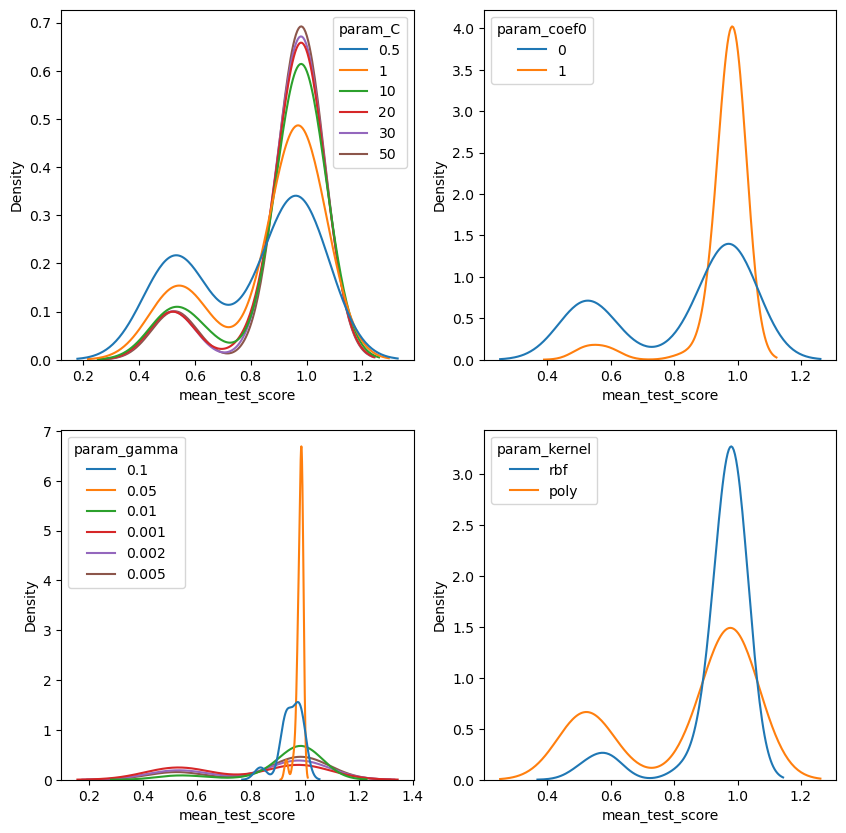

In [26]:
plt.figure(figsize=(10,10))
for i, par in enumerate(param):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=cv_results,x='mean_test_score',hue=par)

In [27]:
model_grid.best_params_

{'C': 1, 'coef0': 1, 'gamma': 0.01, 'kernel': 'poly'}